In [28]:
import pandas as pd
import numpy as np

## Data Preparation

In [55]:
df = pd.read_csv('data/all_data.csv')

In [56]:
df

,year,bracket,round,location,team_one_rank,team_one,team_one_score,team_two_rank,team_two,team_two_score,...,conference_losses_two,conference_win_loss_percentage_two,own_points_per_game_two,opp_points_per_game_two,strength_of_schedule_two,simple_rating_system_two,ap_pre_two,ap_high_two,ap_final_two,conference_tournament_champion_two
0,1985,East,First Round,"Hartford, CT",1,Georgetown,68,16,Lehigh,43,...,8.0,0.429,65.0,70.1,-12.02,-6.89,26.0,26.0,26.0,True
1,1985,East,Second Round,"Hartford, CT",1,Georgetown,63,8,Temple,46,...,3.0,0.833,64.8,57.8,7.67,0.67,26.0,26.0,26.0,True
2,1985,East,Sweet Sixteen,"Providence, RI",1,Georgetown,65,4,Loyola (IL),53,...,1.0,0.929,83.5,77.3,10.29,4.07,26.0,14.0,14.0,True
3,1985,East,Elite Eight,"Providence, RI",1,Georgetown,60,2,Georgia Tech,54,...,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
4,1985,East,Sweet Sixteen,"Providence, RI",3,Illinois,53,2,Georgia Tech,61,...,5.0,0.643,69.9,60.9,16.45,7.42,20.0,6.0,6.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2023,West,First Round,14\nGrand Canyon\n70,3,Gonzaga,82,14,Grand Canyon,70,...,7.0,0.588,72.2,69.1,4.43,1.27,26.0,26.0,26.0,True
1860,2023,West,Sweet Sixteen,"Las Vegas, NV",3,Gonzaga,79,2,UCLA,76,...,2.0,0.900,74.1,60.7,22.11,8.66,8.0,2.0,7.0,False
1861,2023,West,Second Round,"Sacramento, CA",7,Northwestern,63,2,UCLA,68,...,2.0,0.900,74.1,60.7,22.11,8.66,8.0,2.0,7.0,False
1862,2023,West,First Round,"Sacramento, CA",7,Northwestern,75,10,Boise State,67,...,5.0,0.722,71.5,65.0,12.78,6.21,26.0,26.0,26.0,False


In [57]:
pd.get_dummies(df).dtypes[pd.get_dummies(df).dtypes == 'bool']

team_one_wins                         bool
conference_tournament_champion_one    bool
conference_tournament_champion_two    bool
dtype: object

In [58]:
df['team_one_wins'] = (df['team_one_wins'] == True).astype(int)

In [59]:
df['conference_tournament_champion_one'] = (df['conference_tournament_champion_one'] == True).astype(int)

In [60]:
df['conference_tournament_champion_two'] = (df['conference_tournament_champion_two'] == True).astype(int)

In [61]:
data = pd.get_dummies(df)

In [62]:
data

,year,team_one_rank,team_one_score,team_two_rank,team_two_score,team_one_wins,rank_one,overall_wins_one,overall_losses_one,overall_win_loss_percentage_one,...,conference_two_Sun Belt,conference_two_Sun Belt (East),conference_two_Sun Belt (West),conference_two_TAAC,conference_two_TAAC (East),conference_two_WAC,conference_two_WAC (Mountain),conference_two_WAC (Pacific),conference_two_WCAC,conference_two_WCC
0,1985,1,68,16,43,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
1,1985,1,63,8,46,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
2,1985,1,65,4,53,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
3,1985,1,60,2,54,1,2.0,35.0,3.0,0.921,...,0,0,0,0,0,0,0,0,0,0
4,1985,3,53,2,61,0,2.0,26.0,9.0,0.743,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2023,3,82,14,70,1,1.0,31.0,6.0,0.838,...,0,0,0,0,0,1,0,0,0,0
1860,2023,3,79,2,76,1,1.0,31.0,6.0,0.838,...,0,0,0,0,0,0,0,0,0,0
1861,2023,7,63,2,68,0,3.0,22.0,12.0,0.647,...,0,0,0,0,0,0,0,0,0,0
1862,2023,7,75,10,67,1,3.0,22.0,12.0,0.647,...,0,0,0,0,0,0,0,0,0,0


## Train-Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = data.drop(['team_one_wins'], axis=1)
X

,year,team_one_rank,team_one_score,team_two_rank,team_two_score,rank_one,overall_wins_one,overall_losses_one,overall_win_loss_percentage_one,conference_wins_one,...,conference_two_Sun Belt,conference_two_Sun Belt (East),conference_two_Sun Belt (West),conference_two_TAAC,conference_two_TAAC (East),conference_two_WAC,conference_two_WAC (Mountain),conference_two_WAC (Pacific),conference_two_WCAC,conference_two_WCC
0,1985,1,68,16,43,2.0,35.0,3.0,0.921,14.0,...,0,0,0,0,0,0,0,0,0,0
1,1985,1,63,8,46,2.0,35.0,3.0,0.921,14.0,...,0,0,0,0,0,0,0,0,0,0
2,1985,1,65,4,53,2.0,35.0,3.0,0.921,14.0,...,0,0,0,0,0,0,0,0,0,0
3,1985,1,60,2,54,2.0,35.0,3.0,0.921,14.0,...,0,0,0,0,0,0,0,0,0,0
4,1985,3,53,2,61,2.0,26.0,9.0,0.743,12.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,2023,3,82,14,70,1.0,31.0,6.0,0.838,14.0,...,0,0,0,0,0,1,0,0,0,0
1860,2023,3,79,2,76,1.0,31.0,6.0,0.838,14.0,...,0,0,0,0,0,0,0,0,0,0
1861,2023,7,63,2,68,3.0,22.0,12.0,0.647,12.0,...,0,0,0,0,0,0,0,0,0,0
1862,2023,7,75,10,67,3.0,22.0,12.0,0.647,12.0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
y = data['team_one_wins']
y

0       1
1       1
2       1
3       1
4       0
       ..
1859    1
1860    1
1861    0
1862    1
1863    1
Name: team_one_wins, Length: 1864, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [67]:
X_train.shape, y_train.shape

((1677, 727), (1677,))

In [68]:
X_test.shape, y_test.shape

((187, 727), (187,))

## Scale the X Features (Optional)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
scaler.fit(X_train)

StandardScaler()

In [51]:
X_train = scaler.transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

## Model Exploration

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [121]:
model = AdaBoostClassifier(n_estimators=18)

In [122]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=18)

In [123]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [124]:
predictions = model.predict(X_test)

In [125]:
predictions

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [126]:
for i in range(len(predictions)):
    row_index = X_test.iloc[i].name
    one_wins = f"{df.iloc[row_index]['team_one']} wins"
    two_wins = f"{df.iloc[row_index]['team_two']} wins"
    print(f"{df.iloc[row_index]['team_one']} vs {df.iloc[row_index]['team_two']} - {one_wins if predictions[i] else two_wins}")

Kentucky vs UAB - Kentucky wins
UCLA vs Kansas - UCLA wins
Duke vs West Virginia - Duke wins
Wisconsin vs Belmont - Wisconsin wins
Western Michigan vs Stanford - Stanford wins
Providence vs Alabama - Providence wins
Purdue vs Georgia - Georgia wins
Minnesota vs Southern Illinois - Minnesota wins
Duke vs San Diego State - Duke wins
Michigan State vs Saint Louis - Michigan State wins
Washington vs Louisville - Louisville wins
Nevada vs Memphis - Memphis wins
Washington vs Illinois - Washington wins
Washington vs Miami (OH) - Miami (OH) wins
Butler vs Maryland - Butler wins
Louisville vs West Virginia - Louisville wins
Nevada vs Creighton - Nevada wins
Kansas vs Bradley - Kansas wins
Arizona State vs Rutgers - Arizona State wins
Kentucky vs West Virginia - Kentucky wins
Michigan State vs Syracuse - Michigan State wins
St. John's (NY) vs Wichita State - St. John's (NY) wins
Texas A&M vs Penn State - Penn State wins
UAB vs Arizona - Arizona wins
Arizona vs Iowa - Arizona wins
Utah vs Arkans

In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        64
           1       0.94      0.99      0.96       123

    accuracy                           0.95       187
   macro avg       0.96      0.93      0.95       187
weighted avg       0.95      0.95      0.95       187



In [117]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

In [119]:
import matplotlib.pyplot as plt

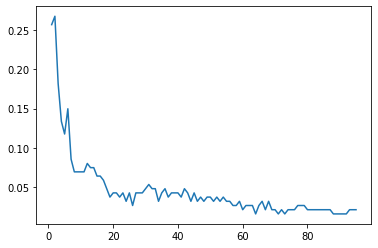

In [120]:
plt.plot(range(1,96),error_rates)

## Cross Validation

In [128]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid = {
    'n_estimators': range(1,96)
}

In [131]:
model = AdaBoostClassifier()
g_search = GridSearchCV(model, param_grid, scoring="neg_mean_squared_error", cv=5, verbose=2)

In [132]:
g_search.fit(X_train, y_train)

Fitting 5 folds for each of 95 candidates, totalling 475 fits
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=1; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=2; total time=   0.0s
[CV] END .....................................n_estimators=3; total time=   0.0s
[CV] END .....................................n

[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=21; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=22; total time=   0.3s
[CV] END ....................................n_estimators=22; total time=   0.2s
[CV] END ....................................n_estimators=23; total time=   0.2s
[CV] END ....................................n_estimators=23; total time=   0.2s
[CV] END ....................................n_estimators=23; total time=   0.2s
[CV] END ...................

[CV] END ....................................n_estimators=41; total time=   0.4s
[CV] END ....................................n_estimators=41; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=42; total time=   0.4s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ....................................n_estimators=43; total time=   0.4s
[CV] END ...................

[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=62; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=63; total time=   0.6s
[CV] END ....................................n_estimators=64; total time=   0.6s
[CV] END ....................................n_estimators=64; total time=   0.8s
[CV] END ...................

[CV] END ....................................n_estimators=82; total time=   0.8s
[CV] END ....................................n_estimators=82; total time=   0.7s
[CV] END ....................................n_estimators=82; total time=   0.8s
[CV] END ....................................n_estimators=83; total time=   0.8s
[CV] END ....................................n_estimators=83; total time=   0.8s
[CV] END ....................................n_estimators=83; total time=   0.7s
[CV] END ....................................n_estimators=83; total time=   0.8s
[CV] END ....................................n_estimators=83; total time=   0.8s
[CV] END ....................................n_estimators=84; total time=   0.8s
[CV] END ....................................n_estimators=84; total time=   0.8s
[CV] END ....................................n_estimators=84; total time=   0.8s
[CV] END ....................................n_estimators=84; total time=   0.8s
[CV] END ...................

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': range(1, 96)},
             scoring='neg_mean_squared_error', verbose=2)

In [133]:
g_search.best_params_

{'n_estimators': 47}

## Model Performance

In [134]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [135]:
import math

In [136]:
y_predict = g_search.predict(X_test)

In [137]:
mae = mean_absolute_error(y_test, y_predict)
mae

0.0374331550802139

In [138]:
mse = mean_squared_error(y_test, y_predict)
mse

0.0374331550802139

In [139]:
rmse = math.sqrt(mse)
rmse

0.19347649748797371

In [144]:
print(accuracy_score(y_test,y_predict))

0.9625668449197861


## Model Performance on Whole Data Set

In [145]:
full_y_predict = g_search.predict(X)

In [149]:
print(accuracy_score(y,full_y_predict))

0.9881974248927039


## Model Export

In [150]:
import joblib

In [152]:
joblib.dump(g_search,'final_model.pkl')

['final_model.pkl']